# VOC Sources

In [35]:
%matplotlib inline

import fair
import pandas as pd
import numpy as np
import scipy.interpolate as scipint
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 16)

from fair.RCPs import rcp85, rcp85wwu_VOC1, rcp85wwu_VOC2, rcp85wwu_VOC3, rcp85wwu_VOC4, rcp85wwu_VOC5  

In [36]:
file = pd.read_csv('SSP_data/SSP_CMIP6_201811.csv')
world_voc_orig = file[(file.REGION == 'World') & (file.UNIT == 'Mt VOC/yr')]
world_voc = world_voc_orig.melt(id_vars=['MODEL','SCENARIO','REGION','VARIABLE','UNIT'], var_name='YEAR', value_name='Emissions')
world_voc.head(13)

C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)
CVOC1, FVOC1, TVOC1 = fair.forward.fair_scm(emissions = rcp85wwu_VOC1.Emissions.emissions)
CVOC2, FVOC2, TVOC2 = fair.forward.fair_scm(emissions = rcp85wwu_VOC2.Emissions.emissions)
CVOC3, FVOC3, TVOC3 = fair.forward.fair_scm(emissions = rcp85wwu_VOC3.Emissions.emissions)
CVOC4, FVOC4, TVOC4 = fair.forward.fair_scm(emissions = rcp85wwu_VOC4.Emissions.emissions)
CVOC5, FVOC5, TVOC5 = fair.forward.fair_scm(emissions = rcp85wwu_VOC5.Emissions.emissions)

In [16]:
# Isolate scenarios - come back to justifying them down the road (picked the highest radiative forcing possible in each scenario)
SSP1_voc = world_voc_orig[(world_voc_orig.SCENARIO == 'SSP1-26')];
SSP2_voc = world_voc_orig[(world_voc_orig.SCENARIO == 'SSP2-45')];
SSP3_voc = world_voc_orig[(world_voc_orig.SCENARIO == 'SSP3-70 (Baseline)')];
SSP4_voc = world_voc_orig[(world_voc_orig.SCENARIO == 'SSP4-60')];
SSP5_voc = world_voc_orig[(world_voc_orig.SCENARIO == 'SSP5-85 (Baseline)')];

In [17]:
all_emiss = (world_voc['Emissions'])
SSP1_index = world_voc[(world_voc.SCENARIO == 'SSP1-26')].index
SSP2_index = world_voc[(world_voc.SCENARIO == 'SSP2-45')].index
SSP3_index = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)')].index
SSP4_index = world_voc[(world_voc.SCENARIO == 'SSP4-60')].index
SSP5_index = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)')].index

In [18]:
# SSP1 
SSP1_Energy = world_voc[(world_voc.SCENARIO == 'SSP1-26') & 
                        (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Energy Sector')]
SSP1_Res = world_voc[(world_voc.SCENARIO == 'SSP1-26') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Residential Commercial Other')]
SSP1_Grassland = world_voc[(world_voc.SCENARIO == 'SSP1-26') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Grassland Burning')]
SSP1_Transportation = world_voc[(world_voc.SCENARIO == 'SSP1-26') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Transportation Sector')]
SSP1_Total = world_voc[(world_voc.SCENARIO == 'SSP1-26') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC')]
SSP1_Solvents = world_voc[(world_voc.SCENARIO == 'SSP1-26') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Solvents Production and Application')]

#SSP3    
SSP3_Energy = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') & 
                        (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Energy Sector')]
SSP3_Res = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Residential Commercial Other')]
SSP3_Grassland = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Grassland Burning')]
SSP3_Transportation = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Transportation Sector')]
SSP3_Total = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC')]
SSP3_Solvents = world_voc[(world_voc.SCENARIO == 'SSP3-70 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Solvents Production and Application')]

#SSP4    
SSP4_Energy = world_voc[(world_voc.SCENARIO == 'SSP4-60') & 
                        (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Energy Sector')]
SSP4_Res = world_voc[(world_voc.SCENARIO == 'SSP4-60') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Residential Commercial Other')]
SSP4_Grassland = world_voc[(world_voc.SCENARIO == 'SSP4-60') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Grassland Burning')]
SSP4_Transportation = world_voc[(world_voc.SCENARIO == 'SSP4-60') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Transportation Sector')]
SSP4_Total = world_voc[(world_voc.SCENARIO == 'SSP4-60') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC')]
SSP4_Solvents = world_voc[(world_voc.SCENARIO == 'SSP4-60') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Solvents Production and Application')]

#SSP5    
SSP5_Energy = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') & 
                        (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Energy Sector')]
SSP5_Res = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Residential Commercial Other')]
SSP5_Grassland = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Grassland Burning')]
SSP5_Transportation = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Transportation Sector')]
SSP5_Total = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC')]
SSP5_Solvents = world_voc[(world_voc.SCENARIO == 'SSP5-85 (Baseline)') &
                     (world_voc.VARIABLE == 'CMIP6 Emissions|VOC|Solvents Production and Application')]

year = SSP1_Energy['YEAR']
RCP_emissions = rcp85.Emissions.emissions[:,7];
RCP_emissions = RCP_emissions[250:335]
RCP_year = rcp85.Emissions.emissions[250:335]


(2015, 2100)

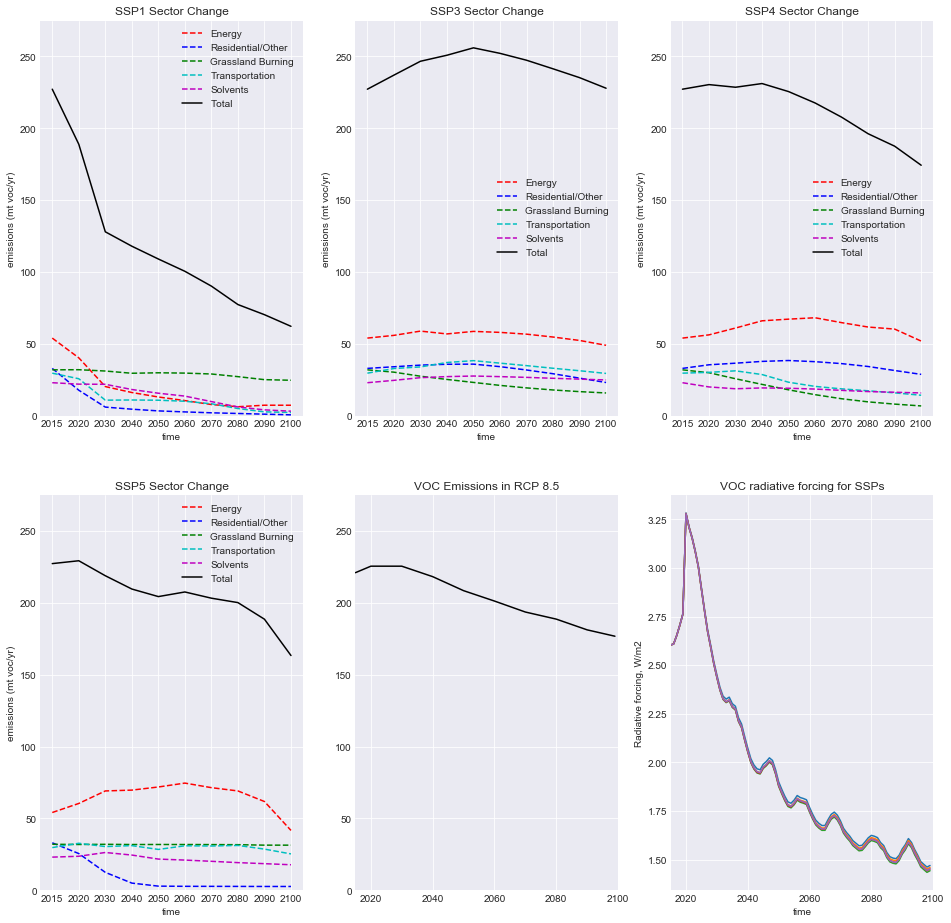

In [41]:
fig = plt.figure()
#SSP1
ax1 = fig.add_subplot(231)
ax1.plot(year, SSP1_Energy['Emissions'], 'r--', year, SSP1_Res['Emissions'],'b--', 
         year, SSP1_Grassland['Emissions'], 'g--',year, SSP1_Transportation['Emissions'],
         'c--', year, SSP1_Solvents['Emissions'],'m--', year, SSP1_Total['Emissions'],'k')
ax1.set_ylim(0, 275)
plt.legend(['Energy', 'Residential/Other','Grassland Burning','Transportation','Solvents','Total']);
plt.title('SSP1 Sector Change')
plt.xlabel('time')
plt.ylabel('emissions (mt voc/yr)')

#SSP3
ax2 = fig.add_subplot(232)
ax2.plot(year, SSP3_Energy['Emissions'], 'r--', year, SSP3_Res['Emissions'],'b--', 
         year, SSP3_Grassland['Emissions'], 'g--',year, SSP3_Transportation['Emissions'],
         'c--',  year, SSP3_Solvents['Emissions'],'m--', year, SSP3_Total['Emissions'],'k')
ax2.set_ylim(0, 275)
plt.legend(['Energy', 'Residential/Other','Grassland Burning','Transportation','Solvents','Total']);
plt.title('SSP3 Sector Change')
plt.xlabel('time')
plt.ylabel('emissions (mt voc/yr)')

#SSP4
ax3 = fig.add_subplot(233)
ax3.plot(year, SSP4_Energy['Emissions'], 'r--', year, SSP4_Res['Emissions'],'b--', 
         year, SSP4_Grassland['Emissions'], 'g--',year, SSP4_Transportation['Emissions'],
         'c--',  year, SSP4_Solvents['Emissions'],'m--', year, SSP4_Total['Emissions'],'k')
ax3.set_ylim(0, 275)
plt.legend(['Energy', 'Residential/Other','Grassland Burning','Transportation','Solvents','Total']);
plt.title('SSP4 Sector Change')
plt.xlabel('time')
plt.ylabel('emissions (mt voc/yr)')

#SSP5
ax4 = fig.add_subplot(234)
ax4.plot(year, SSP5_Energy['Emissions'], 'r--', year, SSP5_Res['Emissions'],'b--', 
         year, SSP5_Grassland['Emissions'], 'g--',year, SSP5_Transportation['Emissions'],
         'c--',  year, SSP5_Solvents['Emissions'],'m--', year, SSP5_Total['Emissions'],'k')
ax4.set_ylim(0, 275)
plt.legend(['Energy', 'Residential/Other','Grassland Burning','Transportation','Solvents','Total']);
plt.title('SSP5 Sector Change')
plt.xlabel('time')
plt.ylabel('emissions (mt voc/yr)')

ax5 = fig.add_subplot(235)
ax5.plot(RCP_year, RCP_emissions, color='black', label='RCP8.5')
ax5.set_title("VOC Emissions in RCP 8.5")#"Nitrous oxide concentrations, ppb")
ax5.set_xlim(right = 2100, left = 2015)
ax5.set_ylim(0, 275)
                              
ax6 = fig.add_subplot(236)
ax6.plot(np.arange(2015, 2100, 1), np.sum(FVOC1[250:335], axis=1), 
         np.arange(2015, 2100, 1), np.sum(FVOC2[250:335], axis=1), 
         np.arange(2015, 2100, 1), np.sum(FVOC3[250:335], axis=1), 
         np.arange(2015, 2100, 1), np.sum(FVOC4[250:335], axis=1),
         np.arange(2015, 2100, 1), np.sum(FVOC5[250:335], axis=1))
ax6.set_title("VOC radiative forcing for SSPs")#"Nitrous oxide concentrations, ppb")
plt.ylabel('Radiative forcing, W/m2')
plt.xlabel('time')
ax6.set_xlim(right = 2100, left = 2015)



In [7]:
SSP1_voc.VARIABLE[5683]

'CMIP6 Emissions|VOC|Solvents Production and Application'

In [10]:
print(rcp85.Emissions)

<class 'fair.RCPs.rcp85.Emissions'>


In [27]:
2100-1765

335

In [12]:
world_voc.head(13)

,MODEL,SCENARIO,REGION,VARIABLE,UNIT,YEAR,Emissions
0,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC,Mt VOC/yr,2015,227.244819
1,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Agricultural Waste Burning,Mt VOC/yr,2015,5.710034
2,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Aircraft,Mt VOC/yr,2015,0.087616
3,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Energy Sector,Mt VOC/yr,2015,54.110744
4,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Forest Burning,Mt VOC/yr,2015,20.492459
5,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Grassland Burning,Mt VOC/yr,2015,32.030049
6,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Industrial Sector,Mt VOC/yr,2015,13.540058
7,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|International Shipping,Mt VOC/yr,2015,3.091079
8,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Peat Burning,Mt VOC/yr,2015,5.037486
9,IMAGE,SSP1-19,World,CMIP6 Emissions|VOC|Residential Commercial Other,Mt VOC/yr,2015,33.035619


In [27]:
print (year)

16      2015
133     2020
250     2030
367     2040
484     2050
601     2060
718     2070
835     2080
952     2090
1069    2100
Name: YEAR, dtype: object


In [28]:
print(FVOC)

[[ 2.62329330e-05  0.00000000e+00  0.00000000e+00 ... -0.00000000e+00
   1.04971077e-01 -5.40000000e-02]
 [ 9.24297009e-05  2.59924742e-04  3.83318773e-05 ... -6.07439364e-06
   1.07048000e-01 -4.80000000e-02]
 [ 1.90994447e-04  7.82388379e-04  1.15354295e-04 ... -1.82231820e-05
   1.07048000e-01 -3.60000000e-02]
 ...
 [ 1.16849962e+00 -4.92305717e-02 -1.81753399e-01 ... -1.90117574e-01
   0.00000000e+00  0.00000000e+00]
 [ 1.16809958e+00 -4.92306606e-02 -1.81819903e-01 ... -1.90117574e-01
   0.00000000e+00  0.00000000e+00]
 [ 1.16770121e+00 -4.92307487e-02 -1.81885863e-01 ... -1.90117574e-01
   0.00000000e+00  0.00000000e+00]]


In [32]:
2015 + 736

2751